In [1]:
import pandas as ps
from kafka import KafkaConsumer
from time import sleep
from json import loads
import json
from s3fs import S3FileSystem

In [2]:
consumer = KafkaConsumer(
    'demo_test',
     bootstrap_servers=['<public ip of server>:9092'], 
    value_deserializer=lambda x: loads(x.decode('utf-8')))

In [3]:
for c in consumer:
    print(c.value)

In [4]:
s3 = S3FileSystem()

In [5]:
for count, i in enumerate(consumer):
    with s3.open("s3://stock-market-kafka-project-vaishali/stock_market_{}.json".format(count), 'w') as file:
        json.dump(i.value, file) 

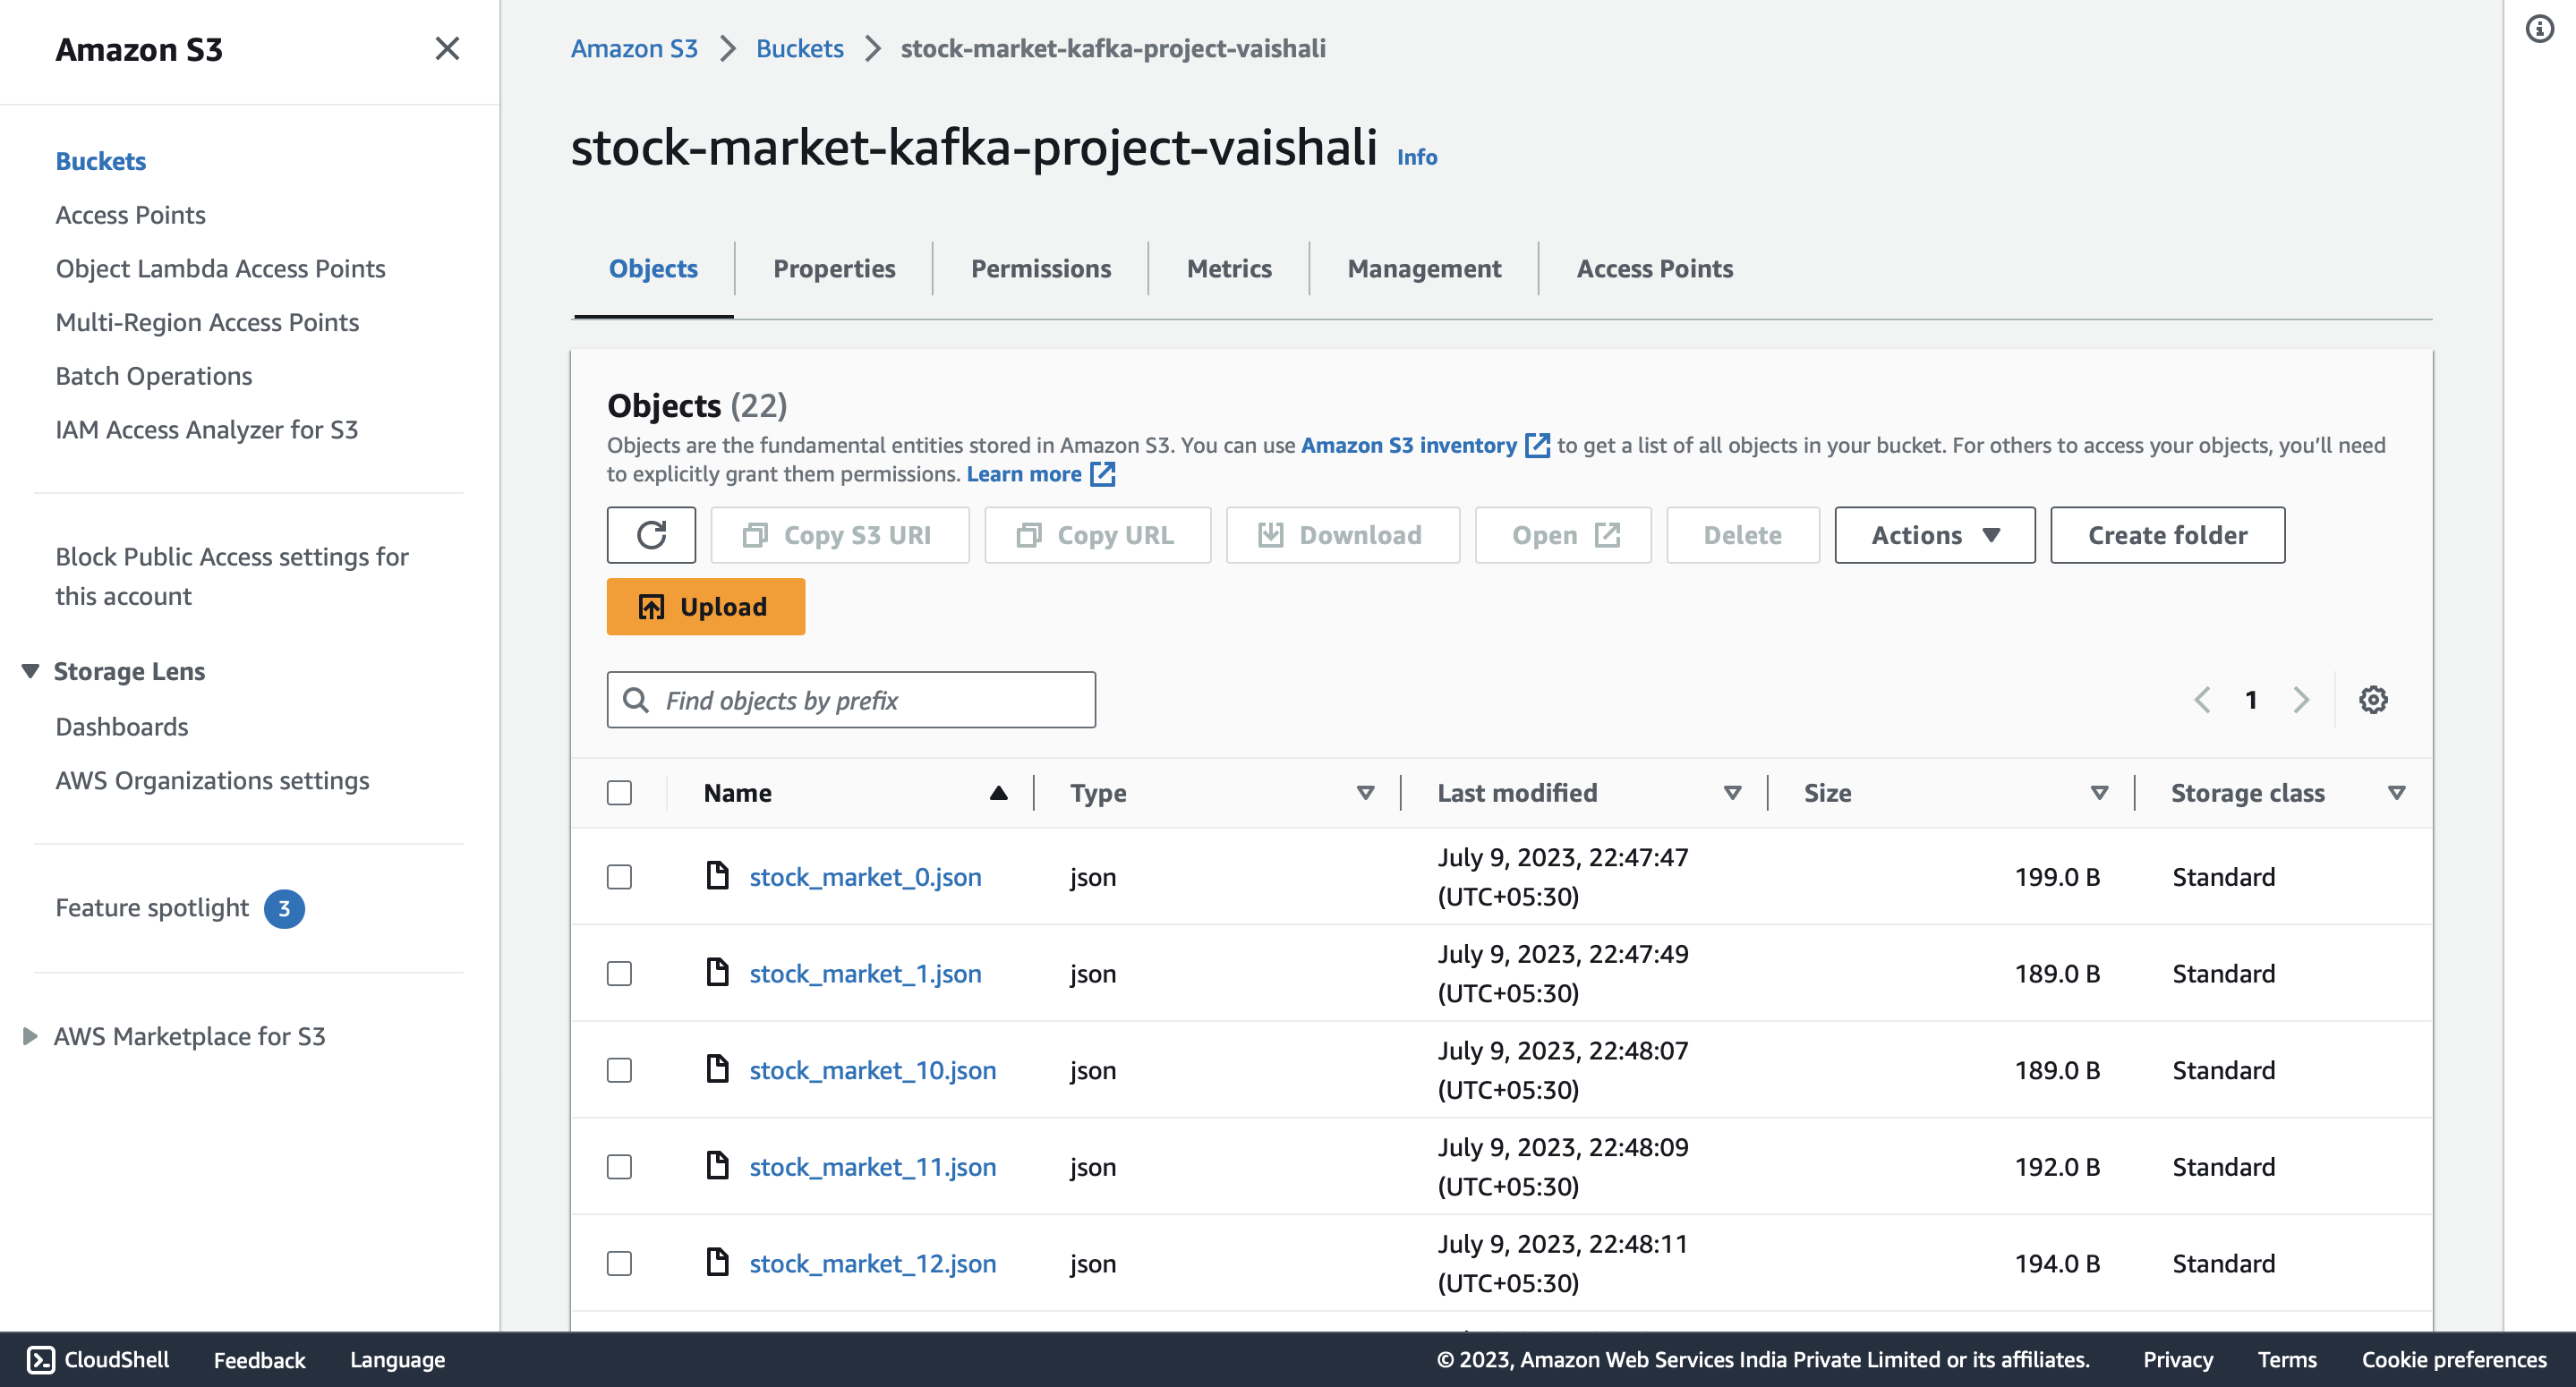